# Start of mess around

In [1]:
from __future__ import print_function

import numpy as np 

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline

import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

import math


# Interesting imports
In order to import mltools properly, we need to modify the module path that python thinks we have

Basically it adds everything 2 folders up onto our python module path, so referencing "mltools" python can see that it is two directories up

In [2]:
# We need to append the module path so we can work with
#     everything that is 2 folders up
import sys
import os
from pathlib import Path

path = Path(os.getcwd())
project_dir = str(path.parent.parent)

picture_folder = str(path) + os.path.sep + "Pictures"

if not os.path.isdir(picture_folder):
    os.mkdir(picture_folder)

curr_path = sys.path
data_path = ""


In [3]:
if project_dir not in curr_path:
    print("Appending'", project_dir, "'to path")
    sys.path.append(project_dir)
    print("Appending'", project_dir + os.path.sep + "data '", "to path")
    sys.path.append(project_dir + os.path.sep + "data")
    data_path = project_dir + os.path.sep + "data" + os.path.sep
    
# Uncomment this if youd like to see all your python module paths
# print(sys.path)

import mltools as ml

Appending' /home/chris/git/ML-FinalProject 'to path
Appending' /home/chris/git/ML-FinalProject/data ' to path


# Import the data

In [67]:
# print(sys.path)
# print(data_path)
X_train = np.genfromtxt(data_path + "X_train.txt", delimiter=None, skip_header=1)
X_test = np.genfromtxt(data_path + "X_test.txt", delimiter=None, skip_header=1)
Y_train = np.genfromtxt(data_path + "Y_train.txt", delimiter=None, skip_header=1)
Data_Labels = np.genfromtxt(data_path + "X_train.txt", delimiter=None, dtype=str, max_rows=1)

# Xtrain,Xval,Ytrain,Yval = ml.splitData(X_train,Y_train[:, 1], 0.75) # split data set 75/25

# print("Data Labels with Column index:\n")
# for i in range(len(Data_Labels)):
#     print(str(i) + ": " + str(Data_Labels[i]))

y_temp = []
x_temp = []
for i in range(len(Y_train)):
    if Y_train[i][0] > 100:
        print("Removing a value")
    else:
        y_temp.append(Y_train[i])
        x_temp.append(X_train[i])

Y_train = np.array(y_temp)
X_train = np.array(x_temp)


Removing a value
Removing a value


In [64]:
cat1 = np.linspace(4, 9, 9-4+1, dtype=int)
cat2 = np.linspace(10, 19, 19-10+1, dtype=int)
cat3 = np.linspace(20, 22, 22-20+1, dtype=int)
cat4 = np.linspace(23, 26, 26-23+1, dtype=int)
cat5 = np.linspace(27, 29, 29-27+1, dtype=int)
cat6 = np.linspace(30, 33, 33-30+1, dtype=int)
cat7 = np.linspace(34, 34, 1, dtype=int)
cat8 = np.linspace(35, 44, 44-35+1, dtype=int)

all_cats = [cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8]
cats = ["Liquidity Ratios", "Profitability Ratios", "Capital Structure", "Working Capital Efficiency", 
        "Debt Management Ratios", "Asset Management Ratios", "Other", "Years"]


## Now I will try to plot something for each feature

In [78]:
from IPython import display

def split_data():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(Y_train)):
        if Y_train[i][1] == 0:
            x0.append(X_train[i])
            y0.append(Y_train[i])
        else:
            x1.append(X_train[i])
            y1.append(Y_train[i])
    x0 = np.array(x0)
    y0 = np.array(y0)
    x1 = np.array(x1)
    y1 = np.array(y1)
    return x0, y0, x1, y1


def create_scatter(category, column):
    
    x0, y0, x1, y1 = split_data()
    
    fig,ax = plt.subplots(1, 1, figsize=(20, 20))

    col = column
    alph = .8

    ax.set_title(Data_Labels[col], fontsize=20)

    ax.scatter(x0[:, col], y0[:, 0], label="Not Distress", c='b', alpha=alph)
    ax.scatter(x1[:, col], y1[:, 0], label="Distress", c='r', alpha=alph)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)

    ax.legend(fontsize=30)
    
    cat_path = picture_folder + os.path.sep + category + os.path.sep
    if not os.path.exists(cat_path):
        os.mkdir(cat_path)
    
    plt.savefig(cat_path + str(Data_Labels[column]))
    
    # Plot results
    display.clear_output(wait=True);
    
    plt.show()


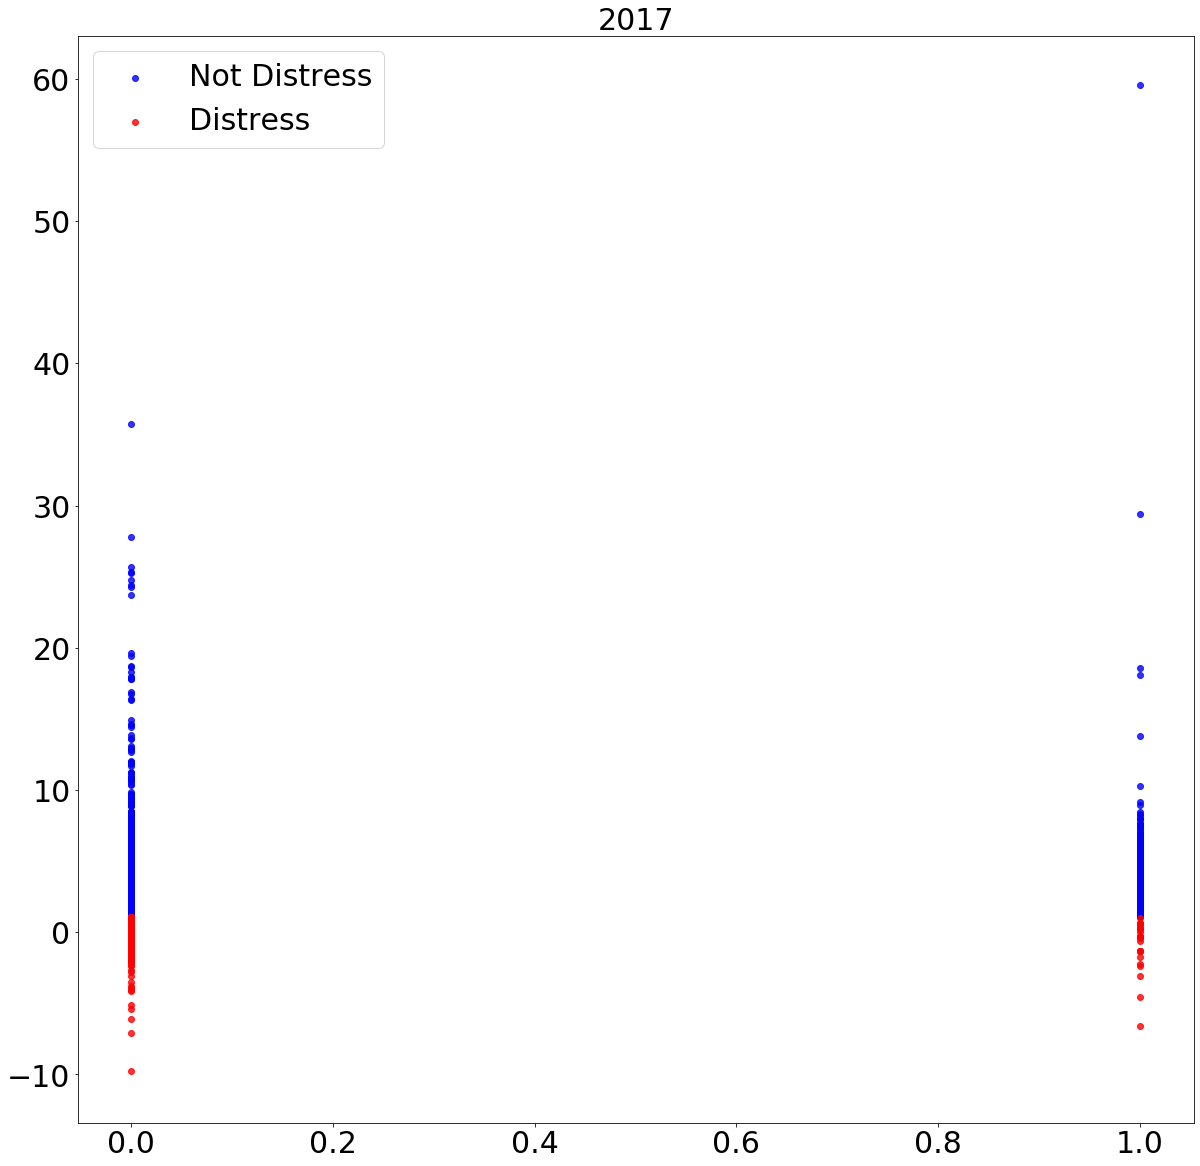

In [79]:

for i in range(len(cats)):
    for j in range(len(all_cats[i])):
        create_scatter(cats[i], all_cats[i][j])
